## <font color=Grey>**Data Mind Classes**</font> 
### <font color=Black>Class 3: Advanced Python & Data Manipulation </font> 

<div class="alert alert-block alert-info">

- ***TOC***

    - Creation of a pandas dataframe from other data types
    - Index and axis
    - Subset pandas dataframe
    - Merge/concatenate/join dataframe
    - Broadcasting in python
    - Loops in python
    - Conditional statement
    - Python functions

  <div class="alert alert-block alert-info">

***Pandas dataframe from other data types***
<div class="alert alert-block alert-success">
> - We often look to work on python dataframes due to ease of usability and intuitition of a 2-D matrix format data. However, we often also need to convert list, dict, etc first to a dataframe and then use them..

<div class="alert alert-block alert-info">

**Data frame from dict**

In [1]:
#### Before we begin, let us create an empty dataframe
import pandas as pd
Empty = pd.DataFrame()   ### no arguments, this creates an empty dataframe
Empty.head()

""


In [2]:
import pandas as pd

Sales_dict = {'sales_person' : ['Kate' , 'David' , 'John'],
         'Jan' : [150, 200, 50],
         'Feb' : [200, 210, 90],
         'Mar' : [140, 215, 95]}
print("Keys in this dict are {}".format(Sales_dict.keys()))
print("Items in this dict are {}".format(Sales_dict.items()))

Keys in this dict are dict_keys(['sales_person', 'Jan', 'Feb', 'Mar'])
Items in this dict are dict_items([('sales_person', ['Kate', 'David', 'John']), ('Jan', [150, 200, 50]), ('Feb', [200, 210, 90]), ('Mar', [140, 215, 95])])


- Dict Keys are like indices for dict much like any relational database schema which is linked by a unique Key
- Dict Items are the values that are stored in each dict cell

In [3]:
### Standard pd.DataFrame command
Sales = pd.DataFrame(Sales_dict)    ##### does not keep order of the dict- we need to reorder explicitly
Sales.head()

,Feb,Jan,Mar,sales_person
0,200,150,140,Kate
1,210,200,215,David
2,90,50,95,John


In [4]:
### Explicit reordering while converting from dict to pd df
Sales = pd.DataFrame(Sales_dict)[['sales_person', 'Jan', 'Feb', 'Mar']]
Sales.head()

,sales_person,Jan,Feb,Mar
0,Kate,150,200,140
1,David,200,210,215
2,John,50,90,95


In [5]:
#### Using pd.DataFrame.from_dict command
Sales = pd.DataFrame.from_dict(Sales_dict,orient = 'columns')  ### meaning keys should be columns
Sales.head()

,Feb,Jan,Mar,sales_person
0,200,150,140,Kate
1,210,200,215,David
2,90,50,95,John


In [6]:
#### Using pd.DataFrame.from_dict command orient = index
Sales = pd.DataFrame.from_dict(Sales_dict,orient = 'index')  ### meaning keys should be rows
Sales.head()

,0,1,2
sales_person,Kate,David,John
Jan,150,200,50
Feb,200,210,90
Mar,140,215,95


<div class="alert alert-block alert-info">
***DataFrame from list***

In [7]:
### recall that we created an empty dataframe at the start of this notebook
### We can store values from lists or dicts in this empty dataframe 
months = ['Jan','Apr','Mar','June']   #### list object
Empty['Months'] = months  #### this assigns the list months to a new column called Months in the empty dataframe
Empty.head()

,Months
0,Jan
1,Apr
2,Mar
3,June


In [8]:
#### suppose we have a list with multiple lists -  in a record like format

data = [['New York Yankees', 'Acevedo Juan', 900000, 'Pitcher'], 
['New York Yankees', 'Anderson Jason', 300000, 'Pitcher'], 
['New York Yankees', 'Clemens Roger', 10100000, 'Pitcher'], 
['New York Yankees', 'Contreras Jose', 5500000, 'Pitcher']]
data_df = pd.DataFrame.from_records(data, columns = ['Team','Player','Hits','Type'])   #### let us also add col names
data_df.head()

### alternatively, pd.Dataframe(data) will also work

,Team,Player,Hits,Type
0,New York Yankees,Acevedo Juan,900000,Pitcher
1,New York Yankees,Anderson Jason,300000,Pitcher
2,New York Yankees,Clemens Roger,10100000,Pitcher
3,New York Yankees,Contreras Jose,5500000,Pitcher


In [9]:
#### our list can be in a item like format as well as below
data1 = [('Team', ['New York Yankees', 'New York Yankees', 'New York Yankees','New York Yankees']),
         ('Player', ['Acevedo Juan', 'Anderson Jason', 'Clemens Roger','Contreras Jose']),
         ('Hits', [900000, 300000, 10100000,5500000]),
         ('Type', ['Pitcher', 'Pitcher', 'Pitcher','Pitcher']),
         ]
df = pd.DataFrame.from_items(data1)
df.head()

,Team,Player,Hits,Type
0,New York Yankees,Acevedo Juan,900000,Pitcher
1,New York Yankees,Anderson Jason,300000,Pitcher
2,New York Yankees,Clemens Roger,10100000,Pitcher
3,New York Yankees,Contreras Jose,5500000,Pitcher


<div class="alert alert-block alert-info">

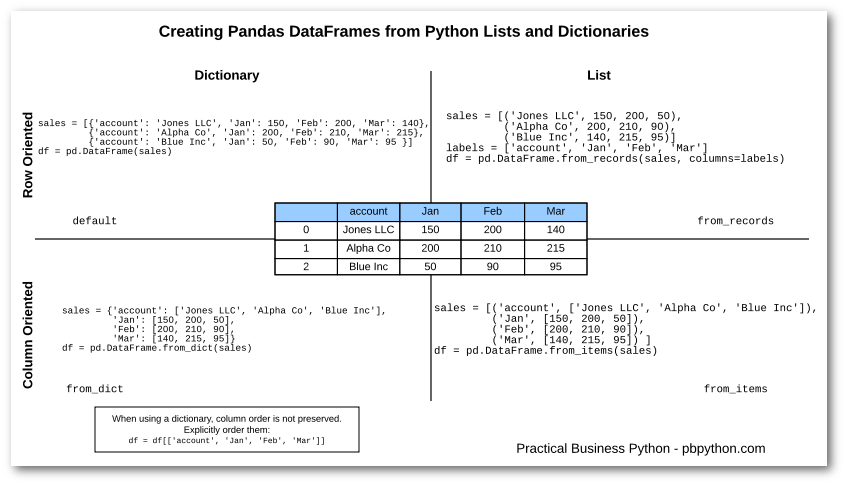

<div class="alert alert-block alert-info">
*** Pandas DataFrame - Index and Axis options***

<div class="alert alert-block alert-info">

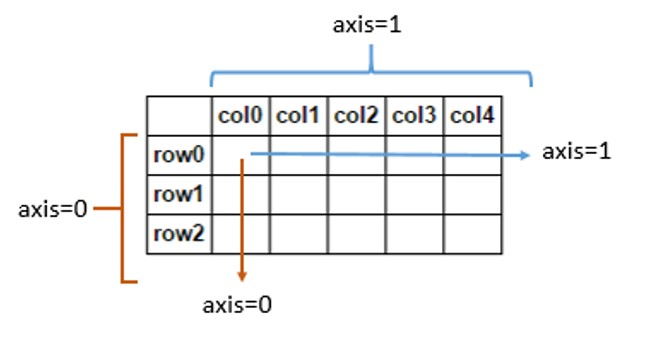


>>> https://stackoverflow.com/questions/25773245/ambiguity-in-pandas-dataframe-numpy-array-axis-definition

In [10]:
#### Lets use the last dataframe we created
data_df.head()

,Team,Player,Hits,Type
0,New York Yankees,Acevedo Juan,900000,Pitcher
1,New York Yankees,Anderson Jason,300000,Pitcher
2,New York Yankees,Clemens Roger,10100000,Pitcher
3,New York Yankees,Contreras Jose,5500000,Pitcher


In [11]:
#### Print out index --- or row names
for i in data_df.index:
    print(i)

0
1
2
3


In [12]:
#### WE can access elements of a dataframe using loc and iloc 

data_df.iloc[2,1] #### means 2nd row, 2nd column entry in the dataframe data_df --- python index vals start from 0

'Clemens Roger'

In [13]:
data_df.loc[:,'Team']  #### use loc is you want to use column names here we access all the teams 

###  " : " means all rows or all columns

0    New York Yankees
1    New York Yankees
2    New York Yankees
3    New York Yankees
Name: Team, dtype: object

<div class="alert alert-block alert-warning">
> **Understanding axis in pandas dataframe**
> - Use axis=0 to apply a method down each column, or to the row labels (the index).
> - Use axis=1 to apply a method across each row, or to the column labels.

<div class="alert alert-block alert-info">

### lets say we want to calculate mean/average for a dataframe across:

1. Across columns --- meaning 1 mean value for each column
2. Across rows ---- meaning 1 mean value for each row

In [14]:
import numpy as np   #### to generate x*y random numbers
df = pd.DataFrame(np.random.rand(10, 4), columns=list('abcd'))
df.head()

,a,b,c,d
0,0.471803,0.302643,0.569250,0.395664
1,0.294268,0.144680,0.819346,0.441034
2,0.851706,0.097930,0.591021,0.776506
3,0.003470,0.433559,0.451838,0.089583
4,0.259448,0.390417,0.646831,0.721847


In [15]:
### For mean across all columns -- or 1 value for each column use axis = 0
df.mean(axis=0)

a    0.414968
b    0.391813
c    0.679900
d    0.482457
dtype: float64

In [16]:
### For mean across all rows -- or 1 value for each rows use axis = 1
df.mean(axis=1)

0    0.434840
1    0.424832
2    0.579291
3    0.244613
4    0.504636
5    0.652087
6    0.633440
7    0.365392
8    0.678553
9    0.405160
dtype: float64

<div class="alert alert-block alert-warning">

>  **To remember easily:**
> -  If you use axis=1 then the result can be appended as a NEW COLUMN to the orignal data
> -  If you use axis=0 then the result can be appended as a NEW ROW to the orignal data

<div class="alert alert-block alert-info">
**Pandas DataFrame: Merge, Join & Concatenate**

### Concatenate 
The concat function (in the main pandas namespace) does all of the heavy lifting of performing concatenation operations along an axis while performing optional set logic (union or intersection) of the indexes (if any) on the other axes

<div class="alert alert-block alert-info">

*** Mergeing along columns or adding rows***
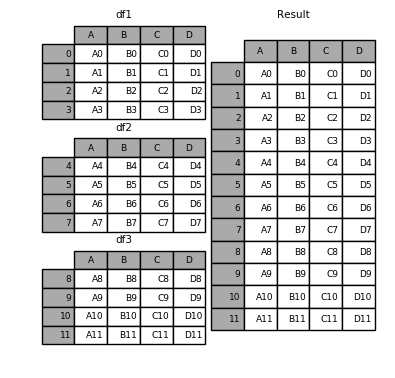
https://pandas.pydata.org/pandas-docs/stable/merging.html

<div class="alert alert-block alert-info">

*** Merging along the rows or adding columns***:
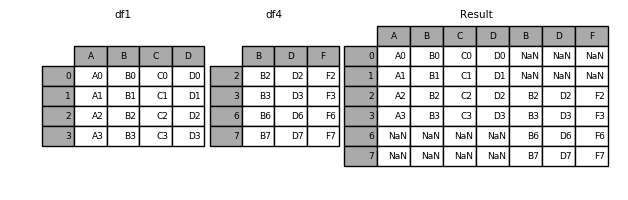

https://pandas.pydata.org/pandas-docs/stable/merging.html

In [17]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
'B': ['B0', 'B1', 'B2', 'B3'],
'C': ['C0', 'C1', 'C2', 'C3'],
'D': ['D0', 'D1', 'D2', 'D3']},
index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
'B': ['B4', 'B5', 'B6', 'B7'],
'C': ['C4', 'C5', 'C6', 'C7'],
'D': ['D4', 'D5', 'D6', 'D7']},
index=[4, 5, 6, 7])

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
'B': ['B8', 'B9', 'B10', 'B11'],
'C': ['C8', 'C9', 'C10', 'C11'],
'D': ['D8', 'D9', 'D10', 'D11']},
index=[8, 9, 10, 11])

frames = [df1, df2, df3]

result = pd.concat(frames,axis=0) #### axis = 0 is we want to append along the columns or add rows
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


<div class="alert alert-block alert-info">

#### We can also use join = options while concatenating to signify what join we want; default is outer join. 
Note that pandas.concat can only do inner and outer join.

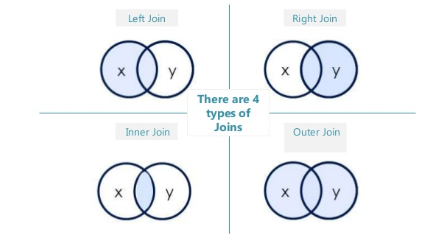

<div class="alert alert-block alert-info">

> ** Example of inner join concatenate**

> pd.concat([df1, df4], axis=1, join='inner')

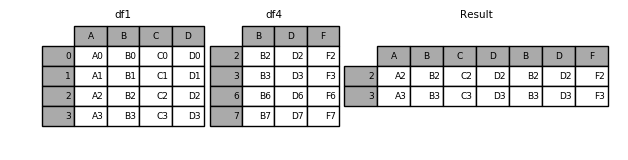

In [18]:
#### Exercise to try in class outer join on the dataframes
df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'],
'D': ['D2', 'D3', 'D6', 'D7'],
'F': ['F2', 'F3', 'F6', 'F7']},
index=[2, 3, 6, 7])

<div class="alert alert-block alert-info">

** Pandas Merge functionaliy: Database-style DataFrame joining/merging**

> Pandas has full-featured, high performance in-memory join operations idiomatically very similar to relational databases like SQL. These methods perform significantly better (in some cases well over an order of magnitude better) than other open source implementations (like base::merge.data.frame in R). The reason for this is careful algorithmic design and internal layout of the data in DataFrame.

<div class="alert alert-block alert-warning">

**Syntax**

> pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)
         
> Source: https://pandas.pydata.org/pandas-docs/stable/merging.html

In [19]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
'A': ['A0', 'A1', 'A2', 'A3'],
'B': ['B0', 'B1', 'B2', 'B3']})
left.head()

,A,B,key
0,A0,B0,K0
1,A1,B1,K1
2,A2,B2,K2
3,A3,B3,K3


In [20]:
right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K5'],
'C': ['C0', 'C1', 'C2', 'C3'],
'D': ['D0', 'D1', 'D2', 'D3']})
right.head()

,C,D,key
0,C0,D0,K0
1,C1,D1,K1
2,C2,D2,K2
3,C3,D3,K5


In [21]:
#### inner join default                      
result = pd.merge(left, right, on='key')
result.head()

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A1,B1,K1,C1,D1
2,A2,B2,K2,C2,D2


In [22]:
#### outer join default                      
result = pd.merge(left, right, on='key',how='outer')
result.head()

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A1,B1,K1,C1,D1
2,A2,B2,K2,C2,D2
3,A3,B3,K3,NaN,NaN
4,NaN,NaN,K5,C3,D3


In [23]:
#### left join default                      
result = pd.merge(left, right, on='key',how='left')
result.head()

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A1,B1,K1,C1,D1
2,A2,B2,K2,C2,D2
3,A3,B3,K3,NaN,NaN


In [24]:
#### right join default                      
result = pd.merge(left, right, on='key',how='right')
result.head()

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A1,B1,K1,C1,D1
2,A2,B2,K2,C2,D2
3,NaN,NaN,K5,C3,D3


In [25]:
#### We can also use multiple on columns at once to merge on more than 1 columns. Brief example below:

<div class="alert alert-block alert-info">

***Note: In case of multiple "on" criteria, the inner join will only consider rows that are present in each "on" column and are present in all the dataframes. Example below:***

> result = pd.merge(left, right, on=['key1', 'key2'])

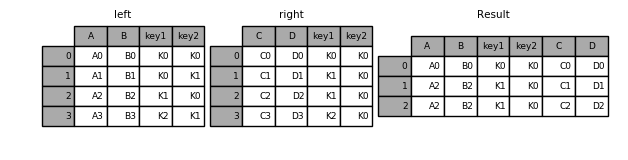

<div class="alert alert-block alert-warning">
***Summary of Merge How methods:***

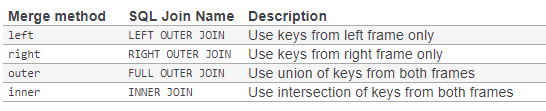

<div class="alert alert-block alert-info">

***Python Broadcasting***: Basically, the method first checks the shape of the two arrays; if a dimension is not the same, it "broadcasts" that dimension to generate arrays of the same dimensions.

Example shown below:


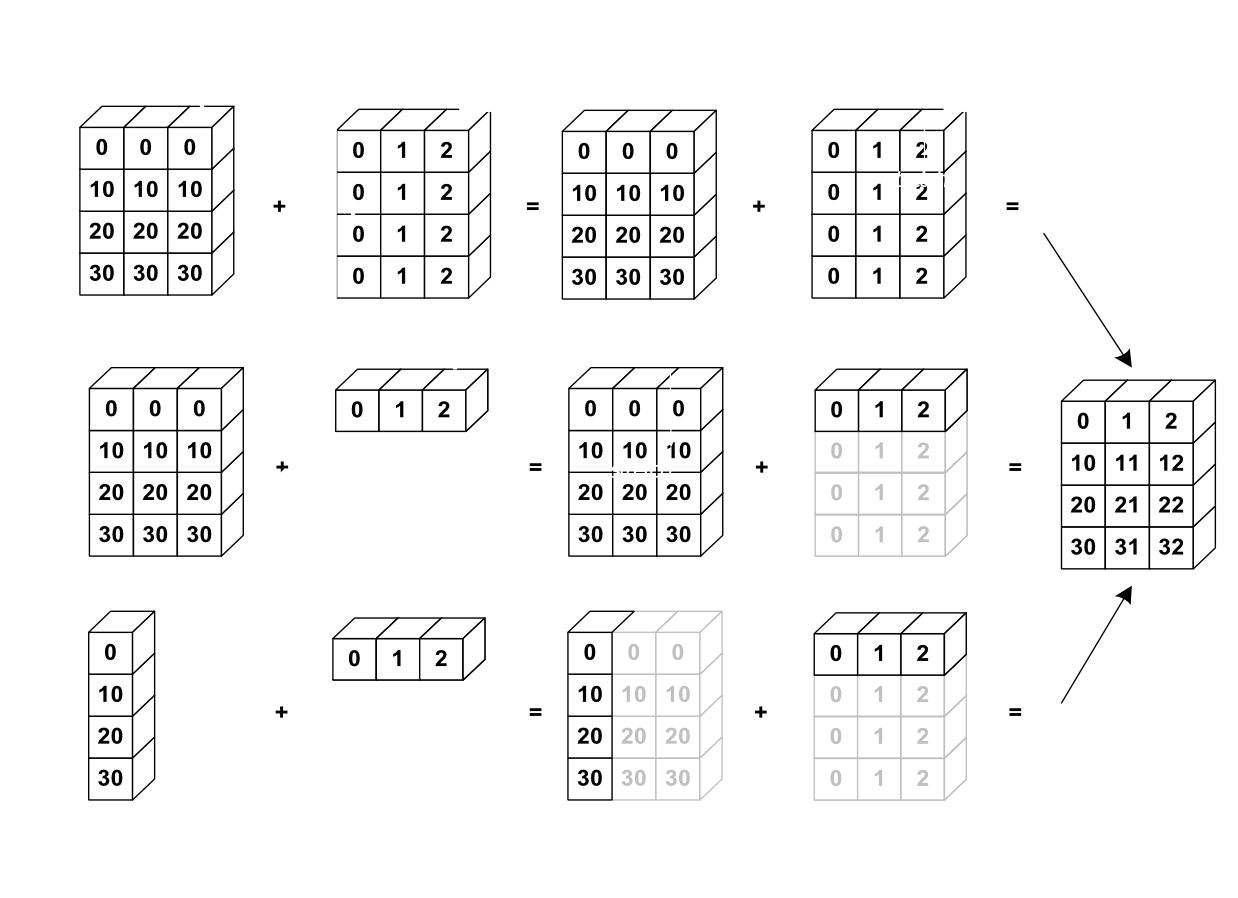

In [26]:
#a = np.array([[0.0,0.0,0.0],[10.0,10.0,10.0],[20.0,20.0,20.0],[30.0,30.0,30.0]]) 

In [27]:
### show constraints that rows or columns should be equal and 1 in some cases
a= np.ones((3,1))
b = np.zeros((1,3))
print(a.shape,b.shape)

(3, 1) (1, 3)


In [28]:
print (a+b)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [29]:
a

array([[1.],
       [1.],
       [1.]])

In [30]:
b

array([[0., 0., 0.]])

In [31]:
### suppose i want to add a particular number to each row of the following np matrix 
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
y = np.array([1,2,3,4])  #### number to be added to each row

In [32]:
x

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [33]:
y.shape

(4,)

In [34]:
x+y.reshape(1,4).T ### remove last number 4 from y and transpose is not required --- either transpose x or change shape of y
### and transpose y --- one is required

array([[ 2,  3,  4],
       [ 6,  7,  8],
       [10, 11, 12],
       [14, 15, 16]])

<div class="alert alert-block alert-warning">

> The other way is to iterate through all the rows and columns to add particular value based on looping; highly inefficient for large matrices. Broadcasting is highly efficient in all cases.

<div class="alert alert-block alert-warning">

**Note: Broadcasting is used mostly in linear algebra or image operations. We will see these properties in details when we get to linear regressions.For now, lets just remember that python can easily extend the size of two arrays in an operations if their sizes do not match for the operation, however, there are limits to these and python will only broadcast only if conditions are met**

<div class="alert alert-block alert-info">

**For Loops**:
>The for loop that is used to iterate over elements of a sequence, it is often  used when you have a piece of code which you want to repeat "n" number of time. 

> The for statement in Python differs a bit from what you may be used to in C or Pascal. Rather than always iterating over an arithmetic progression of numbers (like in Pascal), or giving the user the ability to define both the iteration step and halting condition (as C), Python’s for statement iterates over the items of any sequence (a list or a string), in the order that they appear in the sequence

> It works like this: " for all elements in a list, do this "

In [35]:
#### example:

words = ['cat', 'window', 'defenestrate']
for w in words:
    print(w, len(w))

cat 3
window 6
defenestrate 12


In [36]:
### example:

list1 = ['Noah','Whale','Charles Dickens','Fyodor Dostoyevsky','Vladimir Nabakov'] #### see how python would not allow us to name list1 as list since it is a reserved keyword
for name in list1:
    print(name)

Noah
Whale
Charles Dickens
Fyodor Dostoyevsky
Vladimir Nabakov


In [37]:
#### lets do something more sophisticated
author_dict = {'Writer_1':'Charles Dickens',
               'Writer_2':'Fyodor Dostoyevsky',
               'Writer_3':'Vladimir Nabakov'}

### remember dict have dict.items(), dict.keys(), dict.values()

for name in list1:
    if name in author_dict.values():
        print("{} - This guy is a writer".format(name))
    else:
        print("{} - This guy is not a writer".format(name))

Noah - This guy is not a writer
Whale - This guy is not a writer
Charles Dickens - This guy is a writer
Fyodor Dostoyevsky - This guy is a writer
Vladimir Nabakov - This guy is a writer


In [38]:
x = pd.DataFrame(np.random.rand(10, 4), columns=list('abcd'))
x

,a,b,c,d
0,0.576097,0.345088,0.449574,0.122390
1,0.449576,0.741995,0.189349,0.402439
2,0.616952,0.318445,0.779291,0.250990
3,0.072151,0.887581,0.190782,0.826630
4,0.021089,0.877368,0.738780,0.427727
5,0.219114,0.183907,0.127743,0.521778
6,0.806147,0.854699,0.219379,0.063190
7,0.892086,0.407360,0.567891,0.807460
8,0.175314,0.549790,0.598121,0.850796
9,0.657830,0.526193,0.761562,0.172539


In [39]:
for i in range(len(x)):
    print(i)

0
1
2
3
4
5
6
7
8
9


In [40]:
for i in range(len(x)):
    print(x.iloc[i,1])  ### 1 here means second column

0.34508788911889965
0.7419953932712227
0.31844539446308884
0.8875812386903126
0.8773678145839109
0.18390736155870924
0.8546987566269963
0.4073599040066669
0.549789786940925
0.5261930161481985


<div class="alert alert-block alert-info">

***Python conditional statements: Statements that work by evaluating conditions***

> - **If-elif-else** statement :  Conditionally checks and executes commands
> - **While** statement: Executes commands until a condition in met
> - **Break**: The break statement, like in C, breaks out of the innermost enclosing for or while loop.
> - **Continue**: The continue statement, also borrowed from C, continues with the next iteration of the loop:
> - **Try/catch**: Error catching in python


In [41]:
### if statements syntax

if condition:
    execute something
else:
    do something else

SyntaxError: invalid syntax (<ipython-input-41-c091ec888b78>, line 4)

In [ ]:
list1 = ["Sachin","Sehwag","Rahul","Lara"]

if 'Sachin' in list1:
    print("Yay")

In [ ]:
x = float(input())   #### basic user interface to allow some values

if x <10:
    print("Less than 10")
elif x<20:
    print("less than 20")
elif x<30:
    print("less than 30")
else:
    print("geater than 30")

In [ ]:
x = input()   #### basic user interface to allow some values
print(type(x))

if type(x) is str:
    print("you did not enter a valid number")
else:
    pass

if x <10:
    print("Less than 10")
elif x<20:
    print("less than 20")
elif x<30:
    print("less than 30")
else:
    print("geater than 30")

In [ ]:
x = (input())   #### basic user interface to allow some values
print(type(x))

if type(x) is str:
    print("you did not enter a valid number")
else:
    pass

try:    ### try catch so that code runs even if the values are not per requirements of the code
    if x <10:
        print("Less than 10")
    elif x<20:
        print("less than 20")
    elif x<30:
        print("less than 30")
    else:
        print("geater than 30")
except:
    print('An error occurred.')
    ValueError()
    
#### this still does not work if we put in the right numbers say 1.0 or 15 ---- can we fix it?

<div class="alert alert-block alert-warning">

> There can be zero or more elif parts, and the else part is optional. The keyword ‘elif’ is short for ‘else if’, and is useful to avoid excessive indentation.

<div class="alert alert-block alert-info">

> **While loops**: While loops will continue until a condition is met; so they will execute atlast once!!!

In [ ]:
### A program to print all numbers that appear before an input
i = 5
j = 2
def print_i(i,j):
    #print(i,j)
    while (i>j):
        print(j)
        j+=1

In [ ]:
print_i(4,3)

In [ ]:
for i in range(100):
    if i < 50:
        print(i)
    elif i == 55:
        break
    else:
        print("Still here")

In [ ]:
for i in range(100):
    if i < 50:
        print(i)
    elif i == 55:
        continue
    else:
        print("Still here")

<div class="alert alert-block alert-info">
***Functions: Block of code with arguments that can applied to datasets to yield particulat oututs***
>           
Python functions syntax:

> def function_name(args):
>      
    > Do something
    

In [ ]:
def ask_ok(prompt, retries=4, reminder='Please try again!'):
    while True:
        ok = input(prompt)
        if ok in ('y', 'ye', 'yes'):
            return True
        if ok in ('n', 'no', 'nop', 'nope'):
            return False
        retries = retries - 1
        if retries < 0:
            raise ValueError('invalid user response')
        print(reminder)

<div class="alert alert-block alert-info">

This function can be called in several ways:

- giving only the mandatory argument: ask_ok('Do you really want to quit?')
- giving one of the optional arguments: ask_ok('OK to overwrite the file?', 2)
- or even giving all arguments: ask_ok('OK to overwrite the file?', 2, 'Come on, only yes or no!')


In [ ]:
#### Try yourself

#### Bonus content

<div class="alert alert-block alert-info">

#### Python split-apply-combine
> - Splitting the data into groups based on some criteria
> - Applying a function to each group independently
> - Combining the results into a data structure

<div class="alert alert-block alert-info">

**Aggregation**: computing a summary statistic (or statistics) about each group. Some examples:

> - Compute group sums or means
> - Compute group sizes / counts

**Transformation**: perform some group-specific computations and return a like-indexed. Some examples:

> - Standardizing data (zscore) within group**
> - Filling NAs within groups with a value derived from each group

**Filtration**: discard some groups, according to a group-wise computation that evaluates True or False. Some examples:

> - Discarding data that belongs to groups with only a few members
> - Filtering out data based on the group sum or mean

> Some combination of the above: GroupBy will examine the results of the apply step and try to return a sensibly combined result if it doesn’t fit into either of the above two categories

<div class="alert alert-block alert-danger">

### Splitting an object into groups using groupby

In [ ]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar','foo', 'bar', 'foo', 'foo'],
'B' : ['one', 'one', 'two', 'three',
 'two', 'two', 'one', 'three'],
'C' : np.random.randn(8),
'D' : np.random.randn(8)})

df.head()

In [ ]:
###
grouped = df.groupby('A').sum()
print(grouped.head())
print("--------------------")
grouped = df.groupby(['A', 'B']).mean()
print(grouped.head())
print("---------------------")

In [ ]:
### Iterating through groups

grouped = df.groupby('A')

for name, group in grouped:
    print (name)
    print (group)
    
### note how the index is preserved usless we do reset_index    

In [ ]:
### applying functions on a grouped object
df.groupby('A')['C'].agg([np.sum, np.mean,np.std])  ### groupby on A and stats for column C
#df.groupby('A')['C'].agg([{'sum':np.sum, 'mean':np.mean, 'std':np.std}])  ### custom names

In [ ]:
### we can chain multiple operations 
(grouped['C'].agg([np.sum, np.mean, np.std])
.rename(columns={'sum': 'foo',
'mean': 'bar',
'std': 'baz'}))

<div class="alert alert-block alert-danger">

Transformation

In [ ]:
#### transformation -- transform groupby object
print(grouped.head())
zscore = lambda x: (x - x.mean()) / x.std()
grouped['C'].transform(zscore)

<div class="alert alert-block alert-danger">

Filteration

In [ ]:
###Filtration -- filter groupby objects based on conditions, usually via lambda functions
df.groupby('C').filter(lambda x: x['D']>1)

In [ ]:
#### put it all together
df.groupby('C').filter(lambda x: x['D']>1).mean()

<div class="alert alert-block alert-danger">

> We can also use apply method to apply operations on groupby objects

> https://pandas.pydata.org/pandas-docs/stable/groupby.html

In [ ]:
### See you in the next class